In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

In [2]:
seed = 20161101
N    = 100000000

In [3]:
def rand_koku(n, seed):
    np.random.seed(seed)
    u1 = np.random.rand(n)
    u2 = np.random.rand(n)
    u3 = np.random.rand(n)
    u4 = np.random.rand(n)
    u5 = np.random.rand(n)
    return (u1, (u1+u2+u3+u4+u5)/5.0)

In [4]:
u, uk = rand_koku(N, seed)
print((len(u), len(uk)))

(100000000, 100000000)


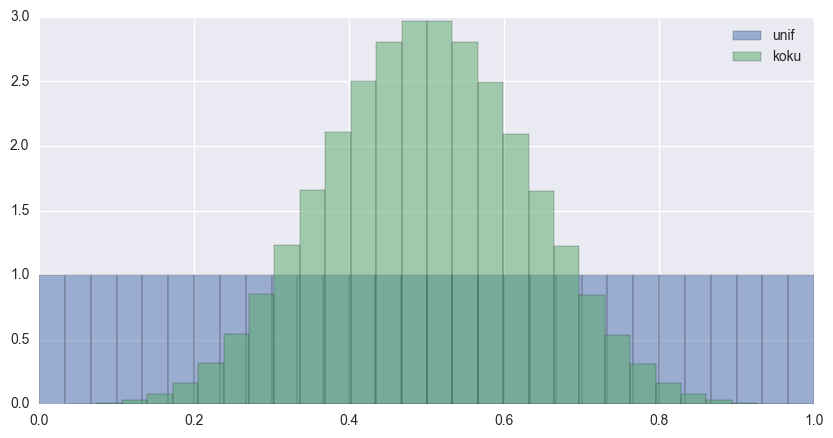

In [5]:
plt.figure(figsize=(10, 5))
plt.hist(u, label='unif',
         bins=30, normed=True, alpha=0.5)
plt.hist(uk, label='koku',
         bins=30, normed=True, alpha=0.5)
plt.legend()

In [6]:
def normal_box_muller(n, seed):
    np.random.seed(seed)
    nm = int(n / 2)
    u  = np.random.rand(n)
    u1 = u[:nm]
    u2 = u[nm:n]
    r  = -2.0 * np.log(u1)
    v  = 2.0 * np.pi * u2
    z1 = np.sqrt(r) * np.cos(v)
    z2 = np.sqrt(r) * np.sin(v)
    z  = np.concatenate([z1, z2, -z1, -z2])
    return z

In [7]:
z_bm = normal_box_muller(N, seed)
print(len(z_bm))
print((z_bm < -4.0).mean())

200000000
3.095e-05


In [8]:
def normal_moro(n, seed):
    np.random.seed(seed)
    a0  = 2.50662823884
    a1  = -18.61500062529
    a2  = 41.39119773534
    a3  = -25.44106049637
    b0  = -8.47351093090
    b1  = 23.08336743743
    b2  = -21.06224101826
    b3  = 3.13082909833
    c0  = 0.3374754822726147
    c1  = 0.9761690190917186
    c2  = 0.1607979714918209
    c3  = 0.0276438810333863
    c4  = 0.0038405729373609
    c5  = 0.0003951896511919
    c6  = 0.0000321767881768
    c7  = 0.0000002888167364
    c8  = 0.0000003960315187
    u   = np.random.rand(n)
    y   = u - 0.5
    f1  = (np.abs(y) < 0.42)
    y1  = y[f1]
    r   = y1 ** 2
    num = ((a3*r+a2)*r+a1)*r+a0
    den = (((b3*r+b2)*r+b1)*r+b0)*r+1.0
    x1  = y1 * num / den
    f2  = np.logical_not(f1)
    u2  = u[f2]
    y2  = y[f2]
    r   = np.where(y2 > 0.0, 1.0 - u2, u2)
    r   = np.log(-np.log(r))
    x2  = c0+r*(c1+r*(c2+r*(c3+r*(c4+r*(c5+r*(c6+r*(c7+r*c8)))))))
    x2  = np.where(y2 < 0.0, -x2, x2)
    z1  = np.concatenate([x1, x2])
    z   = np.concatenate([z1, -z1])
    return z

In [9]:
z_m = normal_moro(N, seed)
print(len(z_m))
print((z_m < -4.0).mean())

200000000
3.169e-05


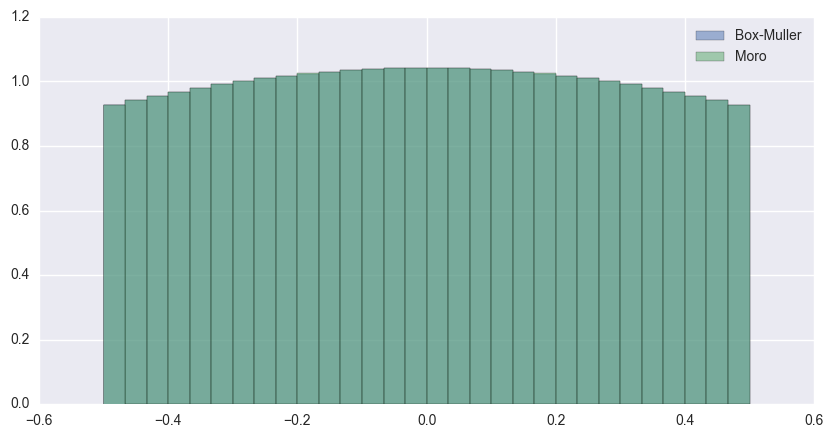

In [10]:
plt.figure(figsize=(10, 5))
plt.hist(z_bm[np.abs(z_bm)<0.5], label='Box-Muller',
         bins=30, normed=True, alpha=0.5)
plt.hist(z_m[np.abs(z_m)<0.5], label='Moro',
         bins=30, normed=True, alpha=0.5)
plt.legend()

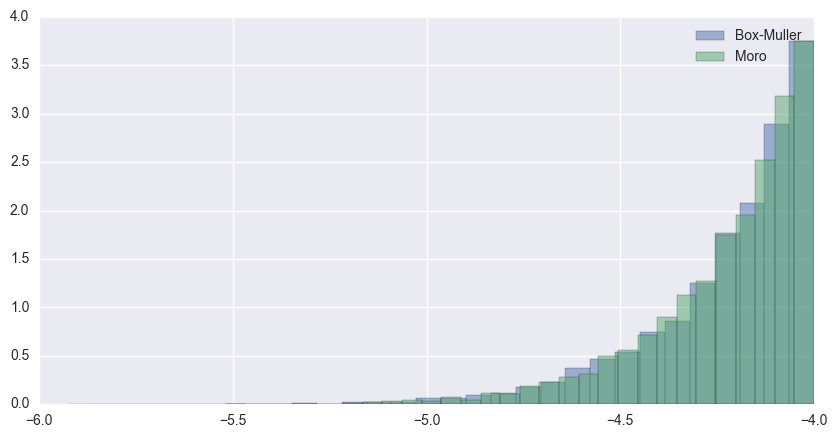

In [11]:
plt.figure(figsize=(10, 5))
plt.hist(z_bm[z_bm<-4.0], label='Box-Muller',
         bins=30, normed=True, alpha=0.5)
plt.hist(z_m[z_m<-4.0], label='Moro',
         bins=30, normed=True, alpha=0.5)
plt.legend()